## Clone the Repository

In [1]:
!git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git

Cloning into 'fastercnn-pytorch-training-pipeline'...
remote: Enumerating objects: 1241, done.
remote: Counting objects: 100% (338/338), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 1241 (delta 260), reused 255 (delta 243), pack-reused 903
Receiving objects: 100% (1241/1241), 10.56 MiB | 12.92 MiB/s, done.
Resolving deltas: 100% (842/842), done.


In [2]:
# Enter the repo directory.
%cd fastercnn-pytorch-training-pipeline/

/content/fastercnn-pytorch-training-pipeline


In [3]:
# Install the Requirements
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.8/728.8 kB 66.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.3/211.3 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 11.4 MB/s eta 0:00:00
  Created wheel for vision_transformers: filename=vision_transformers-0.1.1.0-py3-none-any.whl size=48416 sha256=d5

## Download the Dataset

Here we are using the [Aquarium Dataset](https://public.roboflow.com/object-detection/aquarium) from Roboflow.

Download the unzip the dataset to `custom_data` directory.

In [4]:
!curl -L "https://public.roboflow.com/ds/CNyGy97q45?key=eSpwiC1Ah7" > roboflow.zip; unzip roboflow.zip -d custom_data; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   891  100   891    0     0   3697      0 --:--:-- --:--:-- --:--:--  3697
100 68.0M  100 68.0M    0     0  24.7M      0  0:00:02  0:00:02 --:--:-- 32.2M
Archive:  roboflow.zip
 extracting: custom_data/README.dataset.txt  
 extracting: custom_data/README.roboflow.txt  
   creating: custom_data/test/
 extracting: custom_data/test/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg  
 extracting: custom_data/test/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.xml  
 extracting: custom_data/test/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg  
 extracting: custom_data/test/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.xml  
 extracting: custom_data/test/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg  
 extracting: custom_data/test/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.xml

## Create the Custom Dataset YAML File.

In [5]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: 'custom_data/train'
TRAIN_DIR_LABELS: 'custom_data/train'
VALID_DIR_IMAGES: 'custom_data/valid'
VALID_DIR_LABELS: 'custom_data/valid'

# Class names.
CLASSES: [
    '__background__',
    'fish', 'jellyfish', 'penguin',
    'shark', 'puffin', 'stingray',
    'starfish'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 8

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data.yaml


## Training

In [6]:
!python train.py --data data_configs/custom_data.yaml --epochs 5 --model fasterrcnn_resnet50_fpn_v2 --name custom_training --batch 8

2023-07-06 01:19:59.729405: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 01:20:00.918264: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Not using distributed mode
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 3
wandb: You chose "Don't visualize my results"
wandb: Tracking run with wandb version 0.15.5
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.
device cuda
Checking Labels and images...
100% 448/448 [00:00<00:00, 182095.96it/s]
Checking Labels and images...
100% 127/127 [00:00<00:00, 248798.04it/s]
Creating

## Visualize Validation Results

In [7]:
import matplotlib.pyplot as plt
import glob as glob

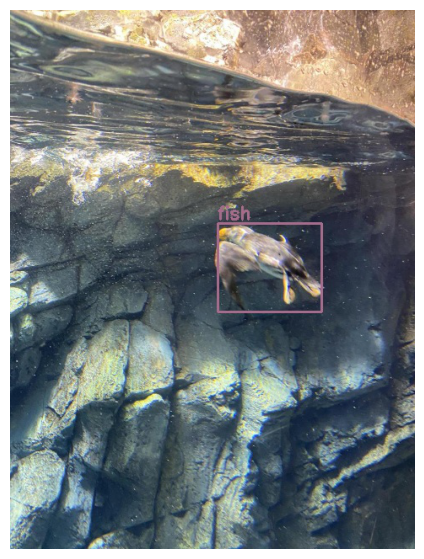

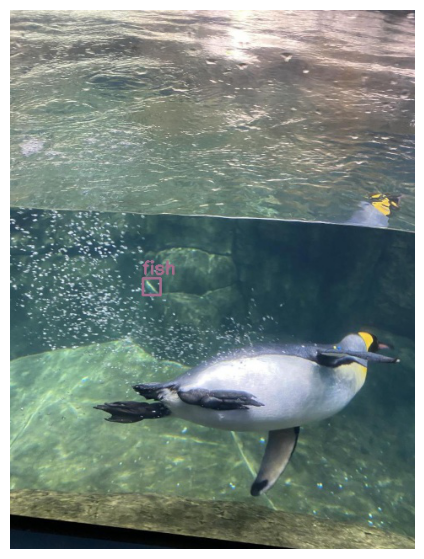

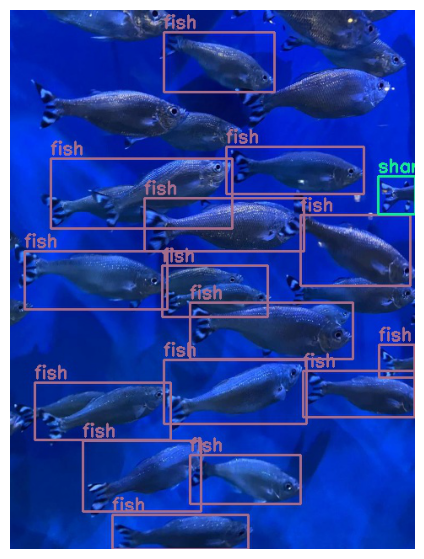

In [8]:
results_dir_path = '/content/fastercnn-pytorch-training-pipeline/outputs/training/custom_training'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(3):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

Check Out the Repo for Latest Updates
https://github.com/sovit-123/fastercnn-pytorch-training-pipeline

## Evaluation

In [9]:
# No verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2

2023-07-06 01:41:47.898967: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 01:41:48.907451: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Checking Labels and images...
100% 127/127 [00:00<00:00, 165942.87it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 16/1

In [10]:
# Verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

2023-07-06 01:42:38.843655: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 01:42:39.900126: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Checking Labels and images...
100% 127/127 [00:00<00:00, 285924.11it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 16/1